# Estimate Compressive Strength of Concrete

This data set is available on the Machine Learning Repository of University of California, Irvine [Concrete Compressive Strength Data Set (UC Irvine)](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength). The UCI page mentions the following publication as the original source of the data set:

_Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)_

## 1- Getting Information From Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "./data/concrete_data.xls"
data = pd.read_excel(file_path)

In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
data.shape

(1030, 9)

In [6]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
data.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water (component 4)(kg in a m^3 mixture),1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age (day),1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


Let us rename the columns, so it is easier to read the headers. 

In [9]:
list_cols = ['Cement(kg/m^3)',
       'Blast_Furnace_Slag(kg/m^3)',
       'Fly_Ash(kg/m^3)',
       'Water(kg/m^3)',
       'Superplasticizer(kg/m^3)',
       'Coarse_Aggregate(kg/m^3)',
       'Fine_Aggregate(kg/m^3)', 'Age(Day)',
       'Concrete_Compressive_Strength(MPa)']

In [10]:
data.columns = list_cols
data.columns

Index(['Cement(kg/m^3)', 'Blast_Furnace_Slag(kg/m^3)', 'Fly_Ash(kg/m^3)',
       'Water(kg/m^3)', 'Superplasticizer(kg/m^3)', 'Coarse_Aggregate(kg/m^3)',
       'Fine_Aggregate(kg/m^3)', 'Age(Day)',
       'Concrete_Compressive_Strength(MPa)'],
      dtype='object')

In [11]:
data.head()

,Cement(kg/m^3),Blast_Furnace_Slag(kg/m^3),Fly_Ash(kg/m^3),Water(kg/m^3),Superplasticizer(kg/m^3),Coarse_Aggregate(kg/m^3),Fine_Aggregate(kg/m^3),Age(Day),Concrete_Compressive_Strength(MPa)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Observe that all the features and the response variable are in a single dataframe object. So, in order to apply regression methods we will create the feature matrix($X$) and the response vector($y$) as follows:

In [12]:
# Creating the feature matrix X
X = data.iloc[:, :-1]

# Creating the response vector y
y = data.iloc[:, -1]

In [13]:
print("The size of the feature matrix is {},\n and of the response vector is {}".format(X.shape, y.shape))

The size of the feature matrix is (1030, 8),
 and of the response vector is (1030,)


## 2 - Outliers
Let us analyse our our response and see whether there are outliers.

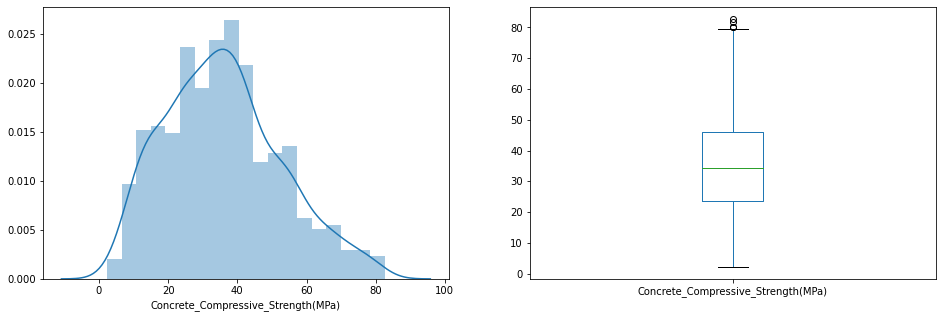

In [14]:
# Target outliers
plt.figure(1)
plt.subplot(121) 
sns.distplot(data['Concrete_Compressive_Strength(MPa)']);
plt.subplot(122) 
data['Concrete_Compressive_Strength(MPa)'].plot.box(figsize=(16,5)) 
plt.show();

Next, we use the IQR method to display data and outliers(shape of the data), ans so we can remove the outliers. From [Wikipedia](https://en.wikipedia.org/wiki/Interquartile_range),

    "The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1. In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers."

In [16]:
# Make a copy of data
data_o = data.copy()
Q1 = data_o.quantile(0.25)
Q3 = data_o.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
data_o = data_o[~((data_o < (Q1 - 1.5*IQR)) | (data_o > (Q3 + 1.5*IQR))).any(axis=1)]
data_o.shape

(941, 9)

Observe that now we removed 89 samples, which is quite a lot. Let us hope this will not heavily affect our analysis. Note also that all the features and the response variable are in a single dataframe object. So, in order to apply regression methods we will create the feature matrix($X$) and the response vector($y$) as follows:

In [18]:
# Creating the feature matrix X
X = data_o.iloc[:, :-1]

# Creating the response vector y
y = data_o.iloc[:, -1]

In [19]:
print("The size of the feature matrix is {},\n and of the response vector is {}".format(X.shape, y.shape))

The size of the feature matrix is (941, 8),
 and of the response vector is (941,)


## 3 - Simple Linear Regression

We've seen in the lectures that the simplest form of linear regression is the one where there is only one feature of a predictor variable/feature. Common sense says that for a better quality concrete, we should use better quality cement. So, to give a precise answer we quantify this relation using a simple linear regression model. To do that we use scikit learn.

In [22]:
# Choosing 'cement' as the only feature from the feature matrix X and reshaping the array to 2 dimensions

cement = X.iloc[:, 1]
cement = cement[:, np.newaxis]

# Choosing 'Concrete Compressive Strength (MPa)' as the response variable and reshaping the array to 2 dimensions
y = data_o.iloc[:,-1]
y = y[:, np.newaxis]

In [23]:
# importing the LinearRegression class from linear_model submodule of scikit learn
from sklearn.linear_model import LinearRegression

# instantiating
simple_lr = LinearRegression()

# Fitting the simple_lr object to the data
simple_lr = LinearRegression().fit(cement, y)

# predicting the response values and saving them in an object called predicted_y
y_pred = simple_lr.predict(cement)

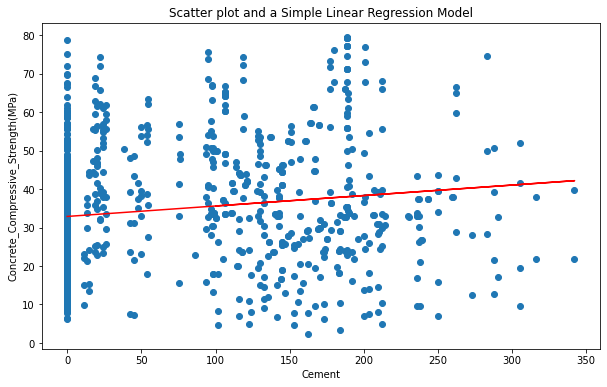

In [24]:
# Plotting the regression line on the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(cement, y)
plt.plot(cement, y_pred, c='r')
plt.title('Scatter plot and a Simple Linear Regression Model')
plt.ylabel("Concrete_Compressive_Strength(MPa)")
plt.xlabel("Cement")
plt.show()

We see that more quantity of cement per m^3 does not in general imply in an increment of Concrete Compressive Strength (MPa).<br>

Next, we use a scoring metric to evaluate our model. Namely, the `neg_mean_squared_error`. The general convention followed by all the metrics in scikit learn is that higher return values are better than lower return values.

Thus metrics which measure the distance between the predicted model values and the actual data values (like metrics.mean_squared_error) are available as neg_mean_squared_error. So, for example, a model with -100 neg_mean_squared_error is better than the one having -150 neg_mean_squared_error.

In [25]:
# Importing cross_val_score function from the model_selection submodule of scikit learn
from sklearn.model_selection import cross_val_score

# Storing the ten scores in an object called mse
mse= cross_val_score(simple_lr, cement, y, scoring='neg_mean_squared_error', cv = 10)

# Taking the mean of mse for using as an indicator of how good the model is
mse.mean()

-296.35187502009705

## 3 - Multiple Linear Regression

Now, we will use the whole feature matrix X, and follow the same steps as in the simple linear model.

In [26]:
# Importing the LinearRegression class from linear_model submodule of scikit learn
from sklearn.linear_model import LinearRegression

# Instantiating
multiple_lr = LinearRegression()

# Fitting the multiple_lr object to the data , this time using the whole feature matrix X
multiple_lr = LinearRegression().fit(X, y)

# Importing cross_val_score function from the model_selection submodule of scikit learn
from sklearn.model_selection import cross_val_score

# Storing the scores in an object called mse
mse= cross_val_score(multiple_lr, X, y, scoring='neg_mean_squared_error', cv = 10)

# Taking the mean of mse for using as an indicator of how good the model is
mse.mean()

-70.37013697102779

That's great news! We see that by adding the seven remaining features to the model along with `cement`, it increases the average 'neg_mean_squared_error' from almost -296.35 to about -70.37, which is a considerable improvement.

###  3.1 - Coefficients With and Without Scaling
Now, we discuss about the scaling of the coefficient values for the `multiple_lr`. Let us first obtain the coefficients without scaling.

In [27]:
# Saving an array containing all the eight coefficients
multiple_lr_coeffs = multiple_lr.coef_[0]
multiple_lr_coeffs

array([ 0.10200155,  0.07550393,  0.04820575, -0.24959453,  0.21601905,
       -0.0102511 , -0.01030291,  0.31269489])

To obtain the scaling coefficients we use `StandardScaler`.

In [28]:
# Import StandarScaler
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
X_ss = scaler.fit_transform(X)

multiple_lr_coeffs_scl = LinearRegression()
multiple_lr_coeffs_scl.fit(X_ss, y)
scale_coeff = multiple_lr_coeffs_scl.coef_[0]

# Coefficients now "on the same scale"
scale_coeff

array([10.38727112,  6.51687477,  3.10102701, -4.67734992,  1.15303798,
       -0.79553842, -0.7730741 ,  8.92540996])

In [29]:
# fetching feature names from the dataframe df
feature_names = data_o.drop('Concrete_Compressive_Strength(MPa)', axis=1).columns
feature_names

Index(['Cement(kg/m^3)', 'Blast_Furnace_Slag(kg/m^3)', 'Fly_Ash(kg/m^3)',
       'Water(kg/m^3)', 'Superplasticizer(kg/m^3)', 'Coarse_Aggregate(kg/m^3)',
       'Fine_Aggregate(kg/m^3)', 'Age(Day)'],
      dtype='object')

In [30]:
comparing_scaling = pd.DataFrame({"Without_Scaling": multiple_lr_coeffs, 
                                  "Scaled": scale_coeff}, index = feature_names)
comparing_scaling

,Without_Scaling,Scaled
Cement(kg/m^3),0.102002,10.387271
Blast_Furnace_Slag(kg/m^3),0.075504,6.516875
Fly_Ash(kg/m^3),0.048206,3.101027
Water(kg/m^3),-0.249595,-4.677350
Superplasticizer(kg/m^3),0.216019,1.153038
Coarse_Aggregate(kg/m^3),-0.010251,-0.795538
Fine_Aggregate(kg/m^3),-0.010303,-0.773074
Age(Day),0.312695,8.925410


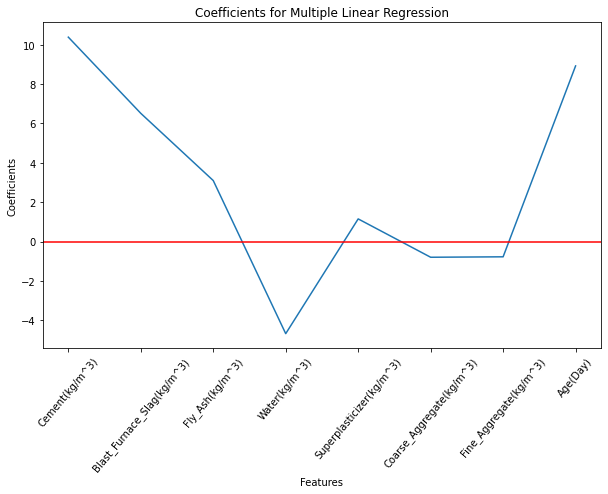

In [31]:
# Using matplotlib commands to plot
plt.figure(figsize=(10,6))
plt.plot(range(len(scale_coeff)), scale_coeff)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("Coefficients")
plt.xlabel("Features")
plt.show()

Note that the features `Water (kg/m^3)`, `Superplasticizer (kg/m^3)`, and `Age (day)` are having a considerable impact on `Concrete Compressive Strength (MPa)`. 

## 4 - Regularization

Linear regression works by selecting coefficients for each independent variable that minimizes a loss function. However, if the coefficients are too large, it can lead to model overfitting on the training dataset. Such a model will not generalize well on the unseen data. To overcome this shortcoming, we do regularization which penalizes large coefficients. 

Recall that Lasso, Ridge, and Elastic Net put constraints on the size of the coefficients associated to each variable. But, this value depends on the magnitude of each variable and it is therefore necessary to center and reduce, or standardize, the variables. In other words, those models are sensitive to the scale of the input features. That's why it is important to scale the data. So, after scaling we can basically build the those models. But for now let us take a look into the correlation matrix of X to better understand the correlation among the features. 


### 4.1 - Correlation

Let us begin with the values of the correlation matrix of X.

In [39]:
correlations = X.corr()
correlations

,Cement(kg/m^3),Blast_Furnace_Slag(kg/m^3),Fly_Ash(kg/m^3),Water(kg/m^3),Superplasticizer(kg/m^3),Coarse_Aggregate(kg/m^3),Fine_Aggregate(kg/m^3),Age(Day)
Cement(kg/m^3),1.000000,-0.262928,-0.373972,-0.088614,0.032485,-0.099477,-0.239606,-0.036295
Blast_Furnace_Slag(kg/m^3),-0.262928,1.000000,-0.351409,0.113826,0.044031,-0.290072,-0.295286,-0.036782
Fly_Ash(kg/m^3),-0.373972,-0.351409,1.000000,-0.250467,0.453768,-0.038483,0.064117,0.054806
Water(kg/m^3),-0.088614,0.113826,-0.250467,1.000000,-0.641072,-0.208405,-0.364127,-0.022218
Superplasticizer(kg/m^3),0.032485,0.044031,0.453768,-0.641072,1.000000,-0.224999,0.114020,0.045365
Coarse_Aggregate(kg/m^3),-0.099477,-0.290072,-0.038483,-0.208405,-0.224999,1.000000,-0.179838,0.021817
Fine_Aggregate(kg/m^3),-0.239606,-0.295286,0.064117,-0.364127,0.114020,-0.179838,1.000000,0.045737
Age(Day),-0.036295,-0.036782,0.054806,-0.022218,0.045365,0.021817,0.045737,1.000000


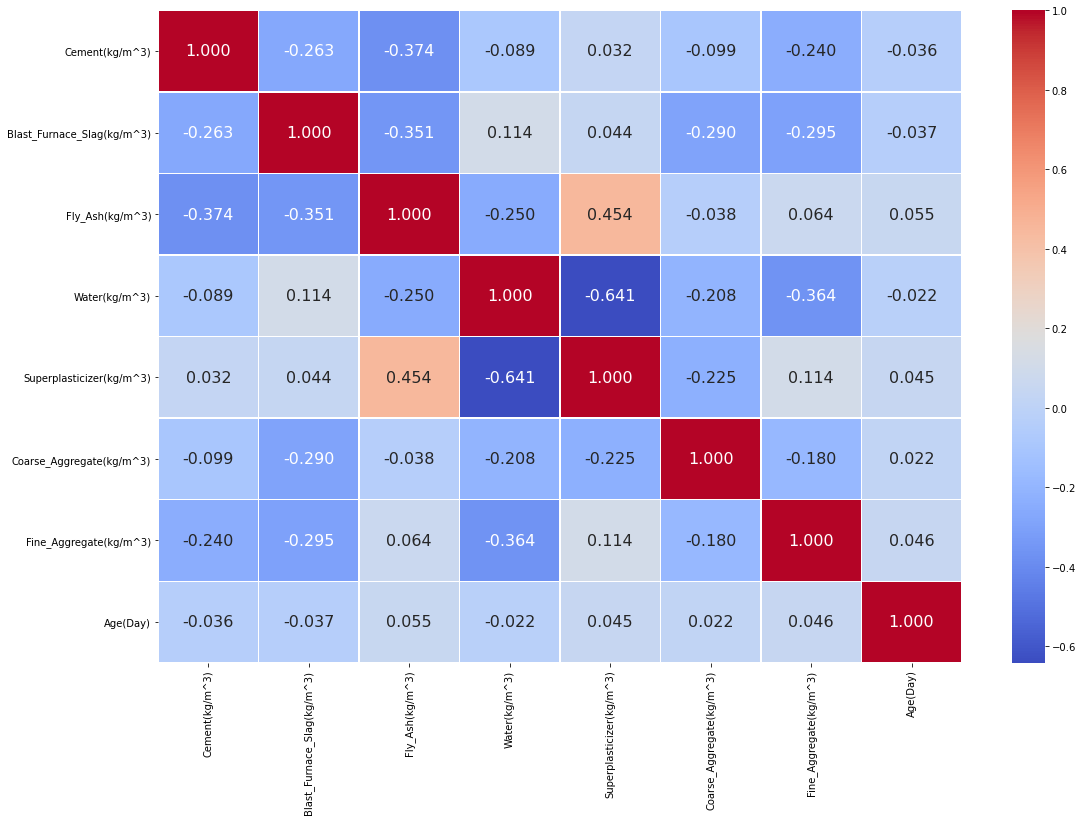

In [33]:
# Use the heatmap to better visualize the correlations
plt.figure(figsize = (18,12))
ax = sns.heatmap(correlations, annot= True, cmap = 'coolwarm', fmt = '.3f', linewidths = .5, annot_kws={'size':16})

Let us recall that a coefficient close to 1 means that there’s a very strong positive correlation between the two variables. The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.

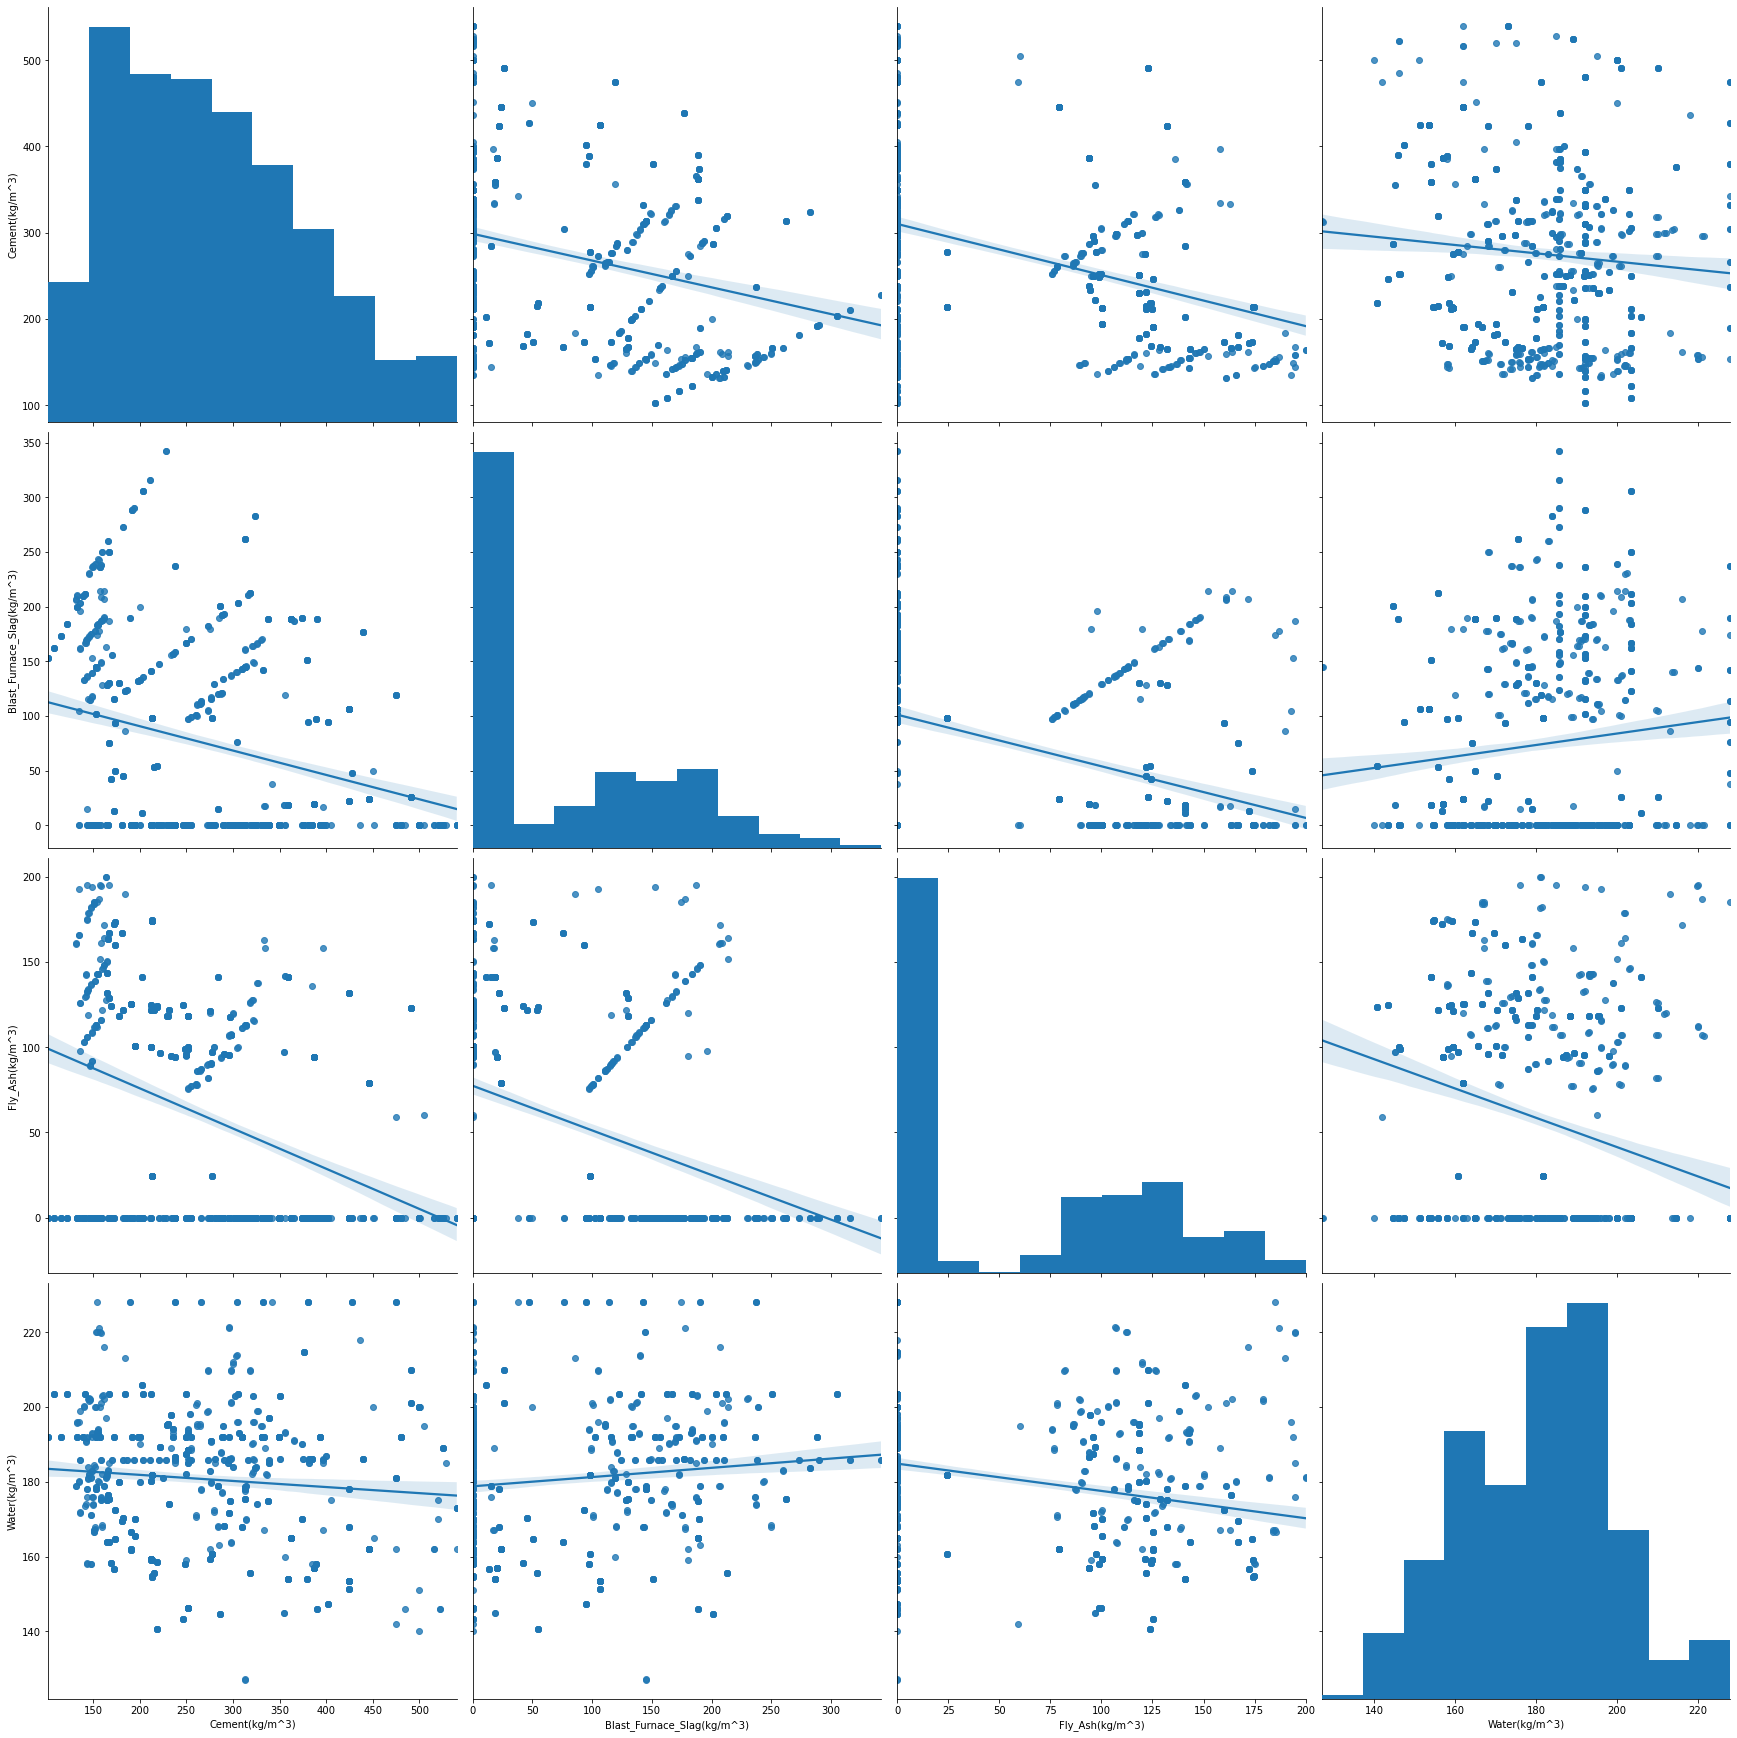

In [34]:
# pair plot with plot type regression of few features
sns.pairplot(data_o, height=6, vars = ['Cement(kg/m^3)', 'Blast_Furnace_Slag(kg/m^3)', 'Fly_Ash(kg/m^3)',
       'Water(kg/m^3)'], kind="reg")
plt.show();

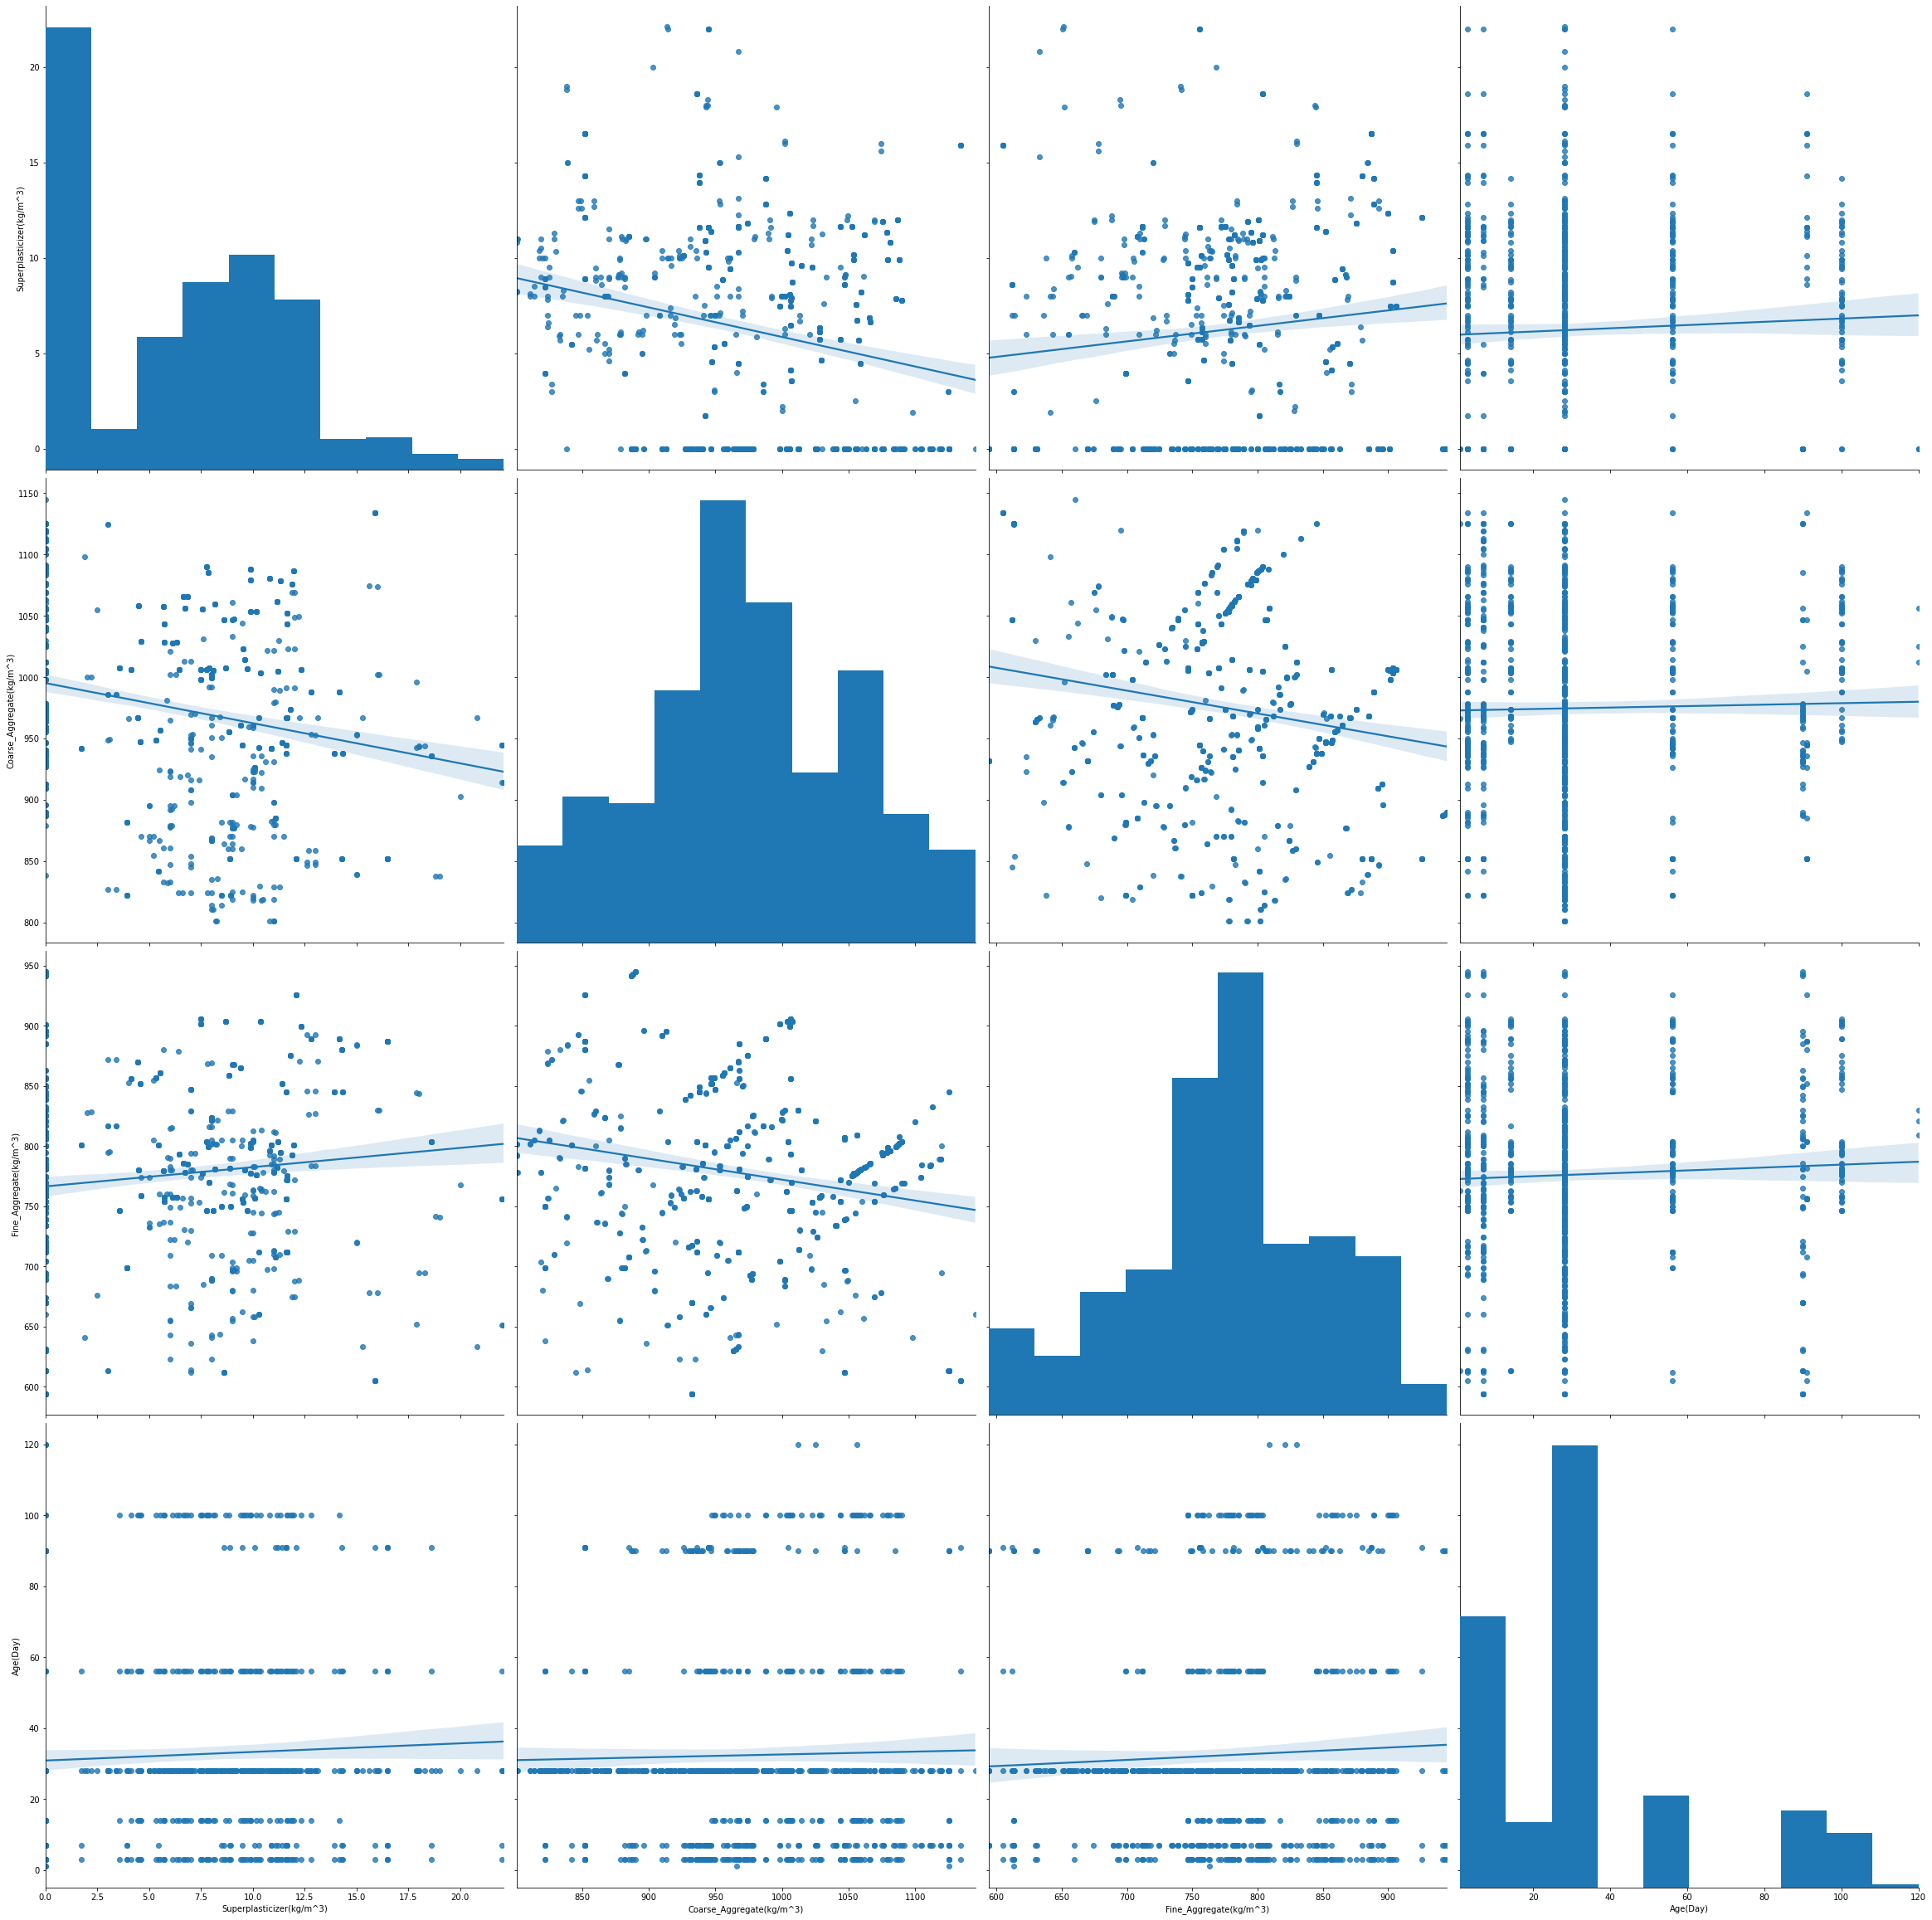

In [35]:
# pair plot with plot type regression of few features
sns.pairplot(data_o, height=8, vars = ['Superplasticizer(kg/m^3)',
       'Coarse_Aggregate(kg/m^3)', 'Fine_Aggregate(kg/m^3)', 'Age(Day)'], kind="reg")
plt.show();

### 4.2 - Ridge Regression

In [40]:
# Import ridge model and mse
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Create ridge object
ridge_reg = Ridge(alpha=0.0001, solver="cholesky")
ridge_reg.fit(X_ss, y)

Ridge(alpha=0.0001, solver='cholesky')

In [41]:
# Print scores, MSE, and coefficients
print("The value of the Ridge Score is: ", ridge_reg.score(X_ss, y))
print("The value of the Ridge MSE is: ", mean_squared_error(y, ridge_reg.predict(X_ss)))
print("The value of the Ridge coefficients are given by: ", ridge_reg.coef_)

The value of the Ridge Score is:  0.7699909403731119
The value of the Ridge MSE is:  63.25669329113457
The value of the Ridge coefficients are given by:  [[10.38725967  6.51686327  3.10101676 -4.67735592  1.15303893 -0.79554585
  -0.77308309  8.92540913]]


### 4.3 - LASSO Regression

In [42]:
# Import lasso model
from sklearn.linear_model import Lasso

# Create lasso object
lasso_reg = Lasso(alpha=0.0001)
lasso_reg.fit(X_ss, y)

Lasso(alpha=0.0001)

In [43]:
# Print scores, MSE, and coefficients
print("The value of the LASSO Score is: ", lasso_reg.score(X_ss, y))
print("The value of the LASSO MSE is: ", mean_squared_error(y, lasso_reg.predict(X_ss)))
print("The value of the LASSO coefficients are given by: ", lasso_reg.coef_)

The value of the LASSO Score is:  0.7699909399208262
The value of the LASSO MSE is:  63.2566934155214
The value of the LASSO coefficients are given by:  [10.38677964  6.51636609  3.10049247 -4.6773217   1.1532388  -0.79563098
 -0.77323219  8.92530348]


### 4.4 - Elastic Net Regression

In [44]:
# Import elastic net model
from sklearn.linear_model import ElasticNet

# Create elastic net object
elastic_net = ElasticNet(alpha = 0.0001, l1_ratio = 0.5)
elastic_net.fit(X_ss, y)

ElasticNet(alpha=0.0001)

In [45]:
# Print scores, MSE, and coefficients
print("The value of the Elastic Net Score is: ", elastic_net.score(X_ss, y))
print("The value of the Elastic Net MSE is: ", mean_squared_error(y, elastic_net.predict(X_ss)))
print("The value of the Elastic Net coefficients are given by: ", elastic_net.coef_)

The value of the Elastic Net Score is:  0.7699909220146199
The value of the Elastic Net MSE is:  63.25669834005526
The value of the Elastic Net coefficients are given by:  [10.38164687  6.5112167   3.09594317 -4.68015582  1.15358607 -0.79907065
 -0.77737678  8.92496674]


### 4.5 - GridSearchCV Algorithm
Our result show that these three models give very similar results. So, we will split the data into training and test sets, build Ridge, Lasso, and Elastic Net, and choose the regularization parameter with the help of GridSearch. For that, we have to define the set of parameters for GridSearch. In this case, the models with the highest R-squared score will give us the best parameters.

In [46]:
# Import libraires to train & test split, and GridSearch class
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.3, random_state=101)

# Choose a set of parameters 
parameters = {'alpha': np.concatenate((np.arange(0.1, 2, 0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

# Call our elementary functions
linear = LinearRegression()
lasso = Lasso()
ridge = Ridge()
elastic = ElasticNet()

# Passing in a Ridge estimator, potential alpha values, scoring method and cross validation parameters
grid_lasso = GridSearchCV(lasso, parameters, scoring ='r2', cv = 10)
grid_ridge = GridSearchCV(ridge, parameters, scoring ='r2', cv = 10)
grid_elastic = GridSearchCV(elastic, parameters, scoring ='r2', cv = 10)

In [47]:
# Fit models
grid_lasso.fit(X_train, y_train)
grid_ridge.fit(X_train, y_train)
grid_elastic.fit(X_train, y_train)
linear.fit(X_train, y_train)

LinearRegression()

In [48]:
# Print the best parameters, R-squared scores, MSE, and coefficients
print("The Linear score is:", linear.score(X_test, y_test))
print("The Linear MSE is:", mean_squared_error(y_test, linear.predict(X_test)))
print("The Linear coefficients are given by:", linear.coef_)

The Linear score is: 0.774058568979143
The Linear MSE is: 64.79609142441656
The Linear coefficients are given by: [[10.52536826  6.89962323  3.74519125 -4.85466783  0.70327259 -0.69842811
  -0.49935532  9.1834837 ]]


In [49]:
# Print the best parameters, R-squared scores, MSE, and coefficients
print("The Ridge best parameter is given by: ", grid_ridge.best_params_)
print("The Ridge score is:", grid_ridge.score(X_test, y_test))
print("The Ridge MSE is:", mean_squared_error(y_test, grid_ridge.predict(X_test)))
print("The Ridge best estimator coefficients are:", grid_ridge.best_estimator_.coef_)

The Ridge best parameter is given by:  {'alpha': 4.0}
The Ridge score is: 0.775132761404772
The Ridge MSE is: 64.48803163076126
The Ridge best estimator coefficients are: [[ 9.9542228   6.31835233  3.22136537 -5.12291949  0.7792346  -1.05103456
  -0.94186316  9.12663785]]


In [50]:
# Print the best parameters, R-squared scores, MSE, and coefficients
print("The LASSO best parameter is: ", grid_lasso.best_params_)
print("The LASSO score is:", grid_lasso.score(X_test, y_test))
print("The LASSO MSE is:", mean_squared_error(y_test, grid_lasso.predict(X_test)))
print("The LASSO best estimator coefficients are:", grid_lasso.best_estimator_.coef_)

The LASSO best parameter is:  {'alpha': 0.1}
The LASSO score is: 0.7755266450884188
The LASSO MSE is: 64.37507260832412
The LASSO best estimator coefficients are: [10.10373319  6.44838583  3.25640753 -4.75157084  0.9298698  -0.72107838
 -0.59619596  9.06293087]


In [51]:
# Print the best parameters, R-squared scores, MSE, and coefficients
print("The Elastic Net best parameter is:", grid_elastic.best_params_)
print("The Elastic Net score is: ", grid_elastic.score(X_test, y_test))
print("The Elastic Net MSE is given by: ", mean_squared_error(y_test, grid_elastic.predict(X_test)))
print("The Elastic Net best estimator coefficients are: ", grid_elastic.best_estimator_.coef_)

The Elastic Net best parameter is: {'alpha': 0.1}
The Elastic Net score is:  0.7756354367538834
The Elastic Net MSE is given by:  64.3438730418267
The Elastic Net best estimator coefficients are:  [ 7.99923835  4.36373989  1.39659861 -5.334509    1.46046495 -1.79539846
 -2.01945052  8.64680622]


So, we can see that there is a slight improvement in our model since our score raises only a little with respect to the previous results.

In [52]:
grid_ridge.best_estimator_.coef_[0]

array([ 9.9542228 ,  6.31835233,  3.22136537, -5.12291949,  0.7792346 ,
       -1.05103456, -0.94186316,  9.12663785])

In [53]:
grid_lasso.best_estimator_.coef_

array([10.10373319,  6.44838583,  3.25640753, -4.75157084,  0.9298698 ,
       -0.72107838, -0.59619596,  9.06293087])

In [54]:
grid_elastic.best_estimator_.coef_

array([ 7.99923835,  4.36373989,  1.39659861, -5.334509  ,  1.46046495,
       -1.79539846, -2.01945052,  8.64680622])

In [55]:
# Creating a dataframe containing coefficient estimates from three models
comparing_models = pd.DataFrame({'Without Scaling': multiple_lr_coeffs,
                                 "Scaled": scale_coeff,
                                 'Ridge (GridSearchCV)': grid_ridge.best_estimator_.coef_[0],
                                 'Lasso (GridSearchCV)': grid_lasso.best_estimator_.coef_,
                                'Elastic Net (GridSearchCV)': grid_elastic.best_estimator_.coef_},
                                index=feature_names)

# Highlighting coefficient estimates with value '0'
def color_red_for_zero(value):
 color = 'red' if value == 0 else 'black'
 return 'color: %s' % color
comparing_models= comparing_models.style.applymap(color_red_for_zero)
comparing_models

,Without Scaling,Scaled,Ridge (GridSearchCV),Lasso (GridSearchCV),Elastic Net (GridSearchCV)
Cement(kg/m^3),0.102002,10.387271,9.954223,10.103733,7.999238
Blast_Furnace_Slag(kg/m^3),0.075504,6.516875,6.318352,6.448386,4.363740
Fly_Ash(kg/m^3),0.048206,3.101027,3.221365,3.256408,1.396599
Water(kg/m^3),-0.249595,-4.677350,-5.122919,-4.751571,-5.334509
Superplasticizer(kg/m^3),0.216019,1.153038,0.779235,0.929870,1.460465
Coarse_Aggregate(kg/m^3),-0.010251,-0.795538,-1.051035,-0.721078,-1.795398
Fine_Aggregate(kg/m^3),-0.010303,-0.773074,-0.941863,-0.596196,-2.019451
Age(Day),0.312695,8.925410,9.126638,9.062931,8.646806


Finally, we compare the MSE calculations and scores for all models in a table.

In [56]:
# Create index
labels = ["Multilinear", "Ridge", "LASSO", "Elastic Net"]

#Create columns
mse_grid = [mean_squared_error(y_test, linear.predict(X_test)),
           mean_squared_error(y_test, grid_ridge.predict(X_test)),
           mean_squared_error(y_test, grid_lasso.predict(X_test)),
           mean_squared_error(y_test, grid_elastic.predict(X_test))]

score_grid =[linear.score(X_test, y_test),
            grid_ridge.score(X_test, y_test),
            grid_lasso.score(X_test, y_test),
            grid_elastic.score(X_test, y_test)]

# Create columns names
col_names = ["MSE(GridSearchCV)", "Score(GridSearchCV)"]

# Create dictionary 
results = {col_names[0]: mse_grid,
          col_names[1]: score_grid}

# Create DataFrame
results_df = pd.DataFrame(results, columns = col_names, index = labels)
results_df

,MSE(GridSearchCV),Score(GridSearchCV)
Multilinear,64.796091,0.774059
Ridge,64.488032,0.775133
LASSO,64.375073,0.775527
Elastic Net,64.343873,0.775635


Surprisingly, the scores for the multilinear model are slightly better (and the MSE are lower). Let us plot the actual and predicted values for `Concrete Compressive Strength (MPa)`.

[Text(0, 0.5, 'Predicted Value in MPa'),
 Text(0.5, 0, 'Actual Value in MPa'),
 Text(0.5, 1.0, 'Linear Regression Results')]

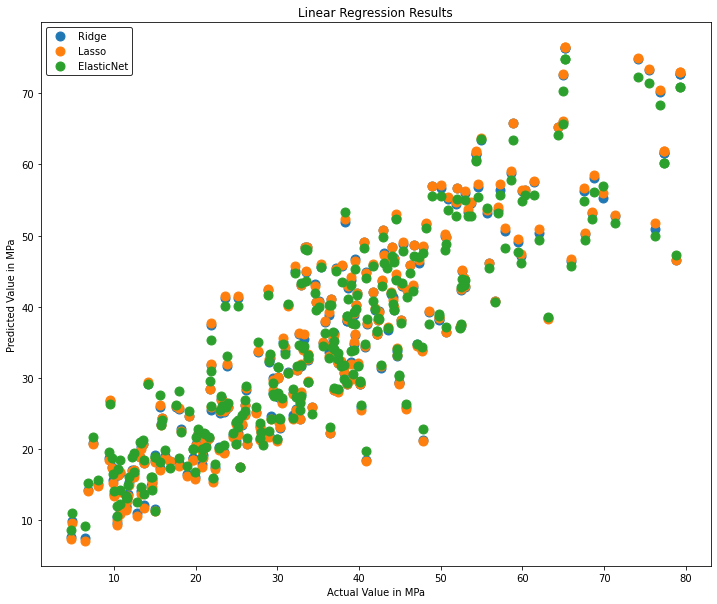

In [57]:
f = plt.figure(figsize=(12, 10))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [grid_lasso, grid_ridge, grid_elastic]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test),
           marker='o', ls='', ms=9.0, label=lab)
    
leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Value in MPa',
      ylabel='Predicted Value in MPa',
      title='Linear Regression Results')

### 4.6 - What About Stochastic Gradient Descent?
It is natural to ask whether we can get lower errors if we apply the method of Stochastic Gradient Descent. Hereby, let us tkae the following extract from [scikit-learn 1.5.2](https://scikit-learn.org/stable/modules/sgd.html#:~:text=Stochastic%20Gradient%20Descent%20(SGD)%20is,Vector%20Machines%20and%20Logistic%20Regression.) user guide:

    "The class SGDRegressor implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties to fit linear regression models. SGDRegressor is well suited for regression problems with a large number of training samples (> 10.000), for other problems we recommend Ridge, Lasso, or ElasticNet."

In our analysis, our data has 1030 samples in total. Therefore, it's not advisable to apply SGD.

## 5 - Regression Methods Using Statsmodels (Optional)

In this section, we play around with statsmodel. From the [statsmodels](https://www.statsmodels.org/stable/regression.html) user guide:

    "Linear models with independently and identically distributed errors, and for errors with heteroscedasticity or autocorrelation. This module allows estimation by ordinary least squares (OLS), weighted least squares (WLS), generalized least squares (GLS), and feasible generalized least squares with autocorrelated AR(p) errors."
    
Statsmodels is a library used widely for linear regression. The linear regression library has convenient ways to specify parameters for regression and hence is popularly used.     

In [58]:
# Load libraries
from sklearn import linear_model
import statsmodels.api as sm

In [59]:
data_o.head()

,Cement(kg/m^3),Blast_Furnace_Slag(kg/m^3),Fly_Ash(kg/m^3),Water(kg/m^3),Superplasticizer(kg/m^3),Coarse_Aggregate(kg/m^3),Fine_Aggregate(kg/m^3),Age(Day),Concrete_Compressive_Strength(MPa)
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [60]:
# Make a copy
dta = data_o.copy()

# Creating the feature matrix X
X = dta.iloc[:, :-1]

# Creating the response vector y
y = dta.iloc[:, -1]

In [61]:
# Adding a constant
X = sm.add_constant(X)

# Create model
mpa_model = sm.OLS(y, X).fit()

In [62]:
# Print summary
mpa_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Concrete_Compressive_Strength(MPa)   R-squared:                       0.770
Model:                                            OLS   Adj. R-squared:                  0.768
Method:                                 Least Squares   F-statistic:                     390.0
Date:                                Sun, 16 Aug 2020   Prob (F-statistic):          2.92e-291
Time:                                        10:35:20   Log-Likelihood:                -3286.5
No. Observations:                                 941   AIC:                             6591.
Df Residuals:                                     932   BIC:                             6635.
Df Model:                                           8                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         49.9873     22.409      2.231      0.026       6.010      93.964
Cement(kg/m^3)                 0.1020      0.007     14.655      0.000       0.088       0.116
Blast_Furnace_Slag(kg/m^3)     0.0755      0.008      8.982      0.000       0.059       0.092
Fly_Ash(kg/m^3)                0.0482      0.010      4.667      0.000       0.028       0.068
Water(kg/m^3)                 -0.2496      0.035     -7.161      0.000      -0.318      -0.181
Superplasticizer(kg/m^3)       0.2160      0.085      2.535      0.011       0.049       0.383
Coarse_Aggregate(kg/m^3)      -0.0103      0.008     -1.311      0.190      -0.026       0.005
Fine_Aggregate(kg/m^3)        -0.0103      0.009     -1.152      0.250      -0.028       0.007
Age(Day)                       0.3127      0.009     34.065      0.000       0.295       0.331
==============================================================================
Omnibus:                        8.746   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               10.120
Skew:                           0.147   Prob(JB):                      0.00635
Kurtosis:                       3.414   Cond. No.                     1.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
# Compute MSE and R-squared
y_hat = mpa_model.predict(X)
mse_lm = mean_squared_error(y, y_hat)
r_squared = mpa_model.rsquared

In [64]:
print("The value of MSE is given by {} \n and the value of R-Squared is given by {}".format(mse_lm,r_squared))

The value of MSE is given by 63.25669329111425 
 and the value of R-Squared is given by 0.7699909403731857
